<a href="https://colab.research.google.com/github/AaronOGI26/Examen2/blob/main/RainTomorrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Introducción 
Tenemos que hacer todo el proceso para sacar predicciones

##Bibliotecas necesarias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as snk
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

##csv de Nacho del RainTomorrow

In [3]:
df_rain=pd.read_csv('/content/drive/MyDrive/examen_2 - examen_2.csv')

##Analisis exploratorio de datos

In [4]:
df_rain.shape

(14546, 22)

In [5]:
df_rain.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,16.6,30.5,16.2,NaN,NaN,NE,31.0,E,NE,...,73.0,45.0,NaN,NaN,NaN,NaN,20.3,29.4,Yes,No
1,1,3.5,21.2,0.0,NaN,NaN,N,74.0,N,NW,...,68.0,43.0,NaN,NaN,NaN,NaN,12.0,15.1,No,No
2,2,9.1,13.8,0.0,1.6,NaN,NE,43.0,NNE,N,...,56.0,50.0,1017.9,1012.3,NaN,NaN,10.6,13.6,No,Yes
3,3,6.5,11.2,4.8,NaN,NaN,W,52.0,W,WSW,...,99.0,95.0,1010.4,1012.6,8.0,8.0,8.5,10.8,Yes,Yes
4,4,25.1,33.1,0.2,8.6,3.3,SSE,46.0,SSE,ESE,...,66.0,53.0,1011.5,1008.8,7.0,7.0,29.5,32.0,No,Yes


In [6]:
df_rain.dtypes

Unnamed: 0         int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df_rain.describe

<bound method NDFrame.describe of        Unnamed: 0  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0               0     16.6     30.5      16.2          NaN       NaN   
1               1      3.5     21.2       0.0          NaN       NaN   
2               2      9.1     13.8       0.0          1.6       NaN   
3               3      6.5     11.2       4.8          NaN       NaN   
4               4     25.1     33.1       0.2          8.6       3.3   
...           ...      ...      ...       ...          ...       ...   
14541       14541     11.8     26.1       NaN          NaN       NaN   
14542       14542      6.3     20.8       0.0          NaN       NaN   
14543       14543     23.9     33.0       2.8          2.0       6.7   
14544       14544     10.5     15.0       3.4          0.8       1.3   
14545       14545      8.4     19.8       0.1          NaN       NaN   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0              NE        

vemos los nulos y los eliminamos

In [8]:
df_rain.isna().sum()

Unnamed: 0          0
MinTemp           129
MaxTemp           120
Rainfall          319
Evaporation      6273
Sunshine         6962
WindGustDir      1038
WindGustSpeed    1034
WindDir9am       1015
WindDir3pm        445
WindSpeed9am      170
WindSpeed3pm      303
Humidity9am       251
Humidity3pm       409
Pressure9am      1525
Pressure3pm      1522
Cloud9am         5495
Cloud3pm         5837
Temp9am           162
Temp3pm           326
RainToday         319
RainTomorrow      319
dtype: int64

In [9]:
df_rainNew=df_rain.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow'])

In [10]:
df_rainNew.isna().sum()

Unnamed: 0       0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

##Outliers de MinTemp

In [11]:
Q1=np.quantile(df_rainNew['MinTemp'],0.25)
Q1

8.7

In [12]:
Q3=np.quantile(df_rainNew['MinTemp'],0.75)
Q3

18.6

In [13]:
IQR=Q3-Q1

In [14]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

33.45


In [15]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-6.150000000000004


In [16]:
Min_V=np.array(df_rainNew['MinTemp'])

In [17]:
inferior =np.where(df_rainNew['MinTemp'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([4328]),)


In [18]:
superior = np.where(df_rainNew['MinTemp'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de MaxTemp

In [19]:
Q1=np.quantile(df_rainNew['MaxTemp'],0.25)
Q1

18.8

In [20]:
Q3=np.quantile(df_rainNew['MaxTemp'],0.75)
Q3

29.7

In [21]:
IQR=Q3-Q1

In [22]:
LIm_sup=Q3+1.5*IQR
print(Lim_sup)

33.45


In [23]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

2.450000000000003


In [24]:
Max_V=np.array(df_rainNew['MaxTemp'])

In [25]:
inferior =np.where(df_rainNew['MaxTemp'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [26]:
superior = np.where(df_rainNew['MaxTemp'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Rainfall

In [27]:
Q1=np.quantile(df_rainNew['Rainfall'],0.25)
Q1

0.0

In [28]:
Q3=np.quantile(df_rainNew['Rainfall'],0.75)
Q3

0.8

In [29]:
IQR=Q3-Q1

In [30]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

2.0


In [31]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-1.2000000000000002


In [32]:
Rain_v=np.array(df_rainNew['Rainfall'])

In [33]:
inferior =np.where(df_rainNew['Rainfall'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [34]:
superior = np.where(df_rainNew['Rainfall'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([   2,    9,   13, ..., 5669, 5676, 5678]),)


##Outliers de Evaporation

In [35]:
Q1=np.quantile(df_rainNew['Evaporation'],0.25)
Q1

2.8

In [36]:
Q3=np.quantile(df_rainNew['Evaporation'],0.75)
Q3

7.6

In [37]:
IQR=Q3-Q1

In [38]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

14.799999999999999


In [39]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-4.3999999999999995


In [40]:
Fall_v=np.array(df_rainNew['Rainfall'])

In [41]:
inferior =np.where(df_rainNew['Rainfall'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [42]:
superior = np.where(df_rainNew['Rainfall'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  33,  137,  169,  185,  195,  202,  210,  271,  278,  314,  332,
        364,  406,  413,  469,  491,  495,  497,  510,  522,  533,  547,
        591,  597,  610,  625,  666,  675,  696,  710,  717,  766,  780,
        810,  812,  824,  828,  856,  881,  932,  952,  982, 1009, 1023,
       1058, 1062, 1068, 1087, 1093, 1111, 1118, 1130, 1151, 1162, 1209,
       1215, 1225, 1227, 1249, 1268, 1293, 1295, 1305, 1340, 1364, 1515,
       1560, 1570, 1584, 1603, 1621, 1713, 1717, 1757, 1780, 1793, 1802,
       1815, 1831, 1846, 1853, 1860, 1888, 1915, 1968, 1975, 1982, 1986,
       1997, 2005, 2038, 2062, 2063, 2069, 2078, 2101, 2147, 2193, 2308,
       2321, 2345, 2357, 2361, 2380, 2398, 2406, 2430, 2470, 2477, 2491,
       2502, 2531, 2546, 2554, 2569, 2654, 2660, 2689, 2724, 2742, 2762,
       2773, 2777, 2783, 2790, 2791, 2808, 2843, 2845, 2859, 2885, 2920,
       2962, 2973, 2976, 3031, 3055, 3082, 3134, 3140, 3190, 3229, 3273,
       3282, 3312, 3319, 3327, 33

##Outliers de Sunshine

In [43]:
Q1=np.quantile(df_rainNew['Sunshine'],0.25)
Q1

5.1

In [44]:
Q3=np.quantile(df_rainNew['Sunshine'],0.75)
Q3

10.7

In [45]:
IQR=Q3-Q1

In [46]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

19.099999999999998


In [47]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-3.299999999999999


In [48]:
Sun_v=np.array(df_rainNew['Sunshine'])

In [49]:
inferior =np.where(df_rainNew['Sunshine'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [50]:
superior = np.where(df_rainNew['Sunshine'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de WindGustSpeed

In [51]:
Q1=np.quantile(df_rainNew['WindGustSpeed'],0.25)
Q1

31.0

In [52]:
Q3=np.quantile(df_rainNew['WindGustSpeed'],0.75)
Q3

48.0

In [53]:
IQR=Q3-Q1

In [54]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

73.5


In [55]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

5.5


In [56]:
Wind_v=np.array(df_rainNew['WindGustSpeed'])

In [57]:
inferior =np.where(df_rainNew['WindGustSpeed'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [58]:
superior = np.where(df_rainNew['WindGustSpeed'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  51,   80,   97,  114,  150,  229,  230,  356,  422,  438,  449,
        578,  654,  719,  784,  903,  906,  926,  963,  980, 1019, 1058,
       1068, 1090, 1132, 1209, 1237, 1245, 1249, 1272, 1340, 1381, 1426,
       1433, 1484, 1532, 1567, 1775, 1799, 1832, 1841, 1860, 1935, 1994,
       2049, 2058, 2068, 2116, 2117, 2271, 2357, 2378, 2398, 2421, 2448,
       2454, 2479, 2551, 2553, 2590, 2695, 2697, 2742, 2790, 2792, 2832,
       2836, 2858, 3044, 3049, 3167, 3190, 3270, 3286, 3465, 3495, 3518,
       3537, 3571, 3592, 3627, 3638, 3644, 3654, 3670, 3702, 3719, 3731,
       3777, 3778, 3782, 3820, 3829, 3887, 4038, 4104, 4147, 4177, 4313,
       4369, 4384, 4475, 4530, 4541, 4568, 4608, 4638, 4643, 4734, 4794,
       4804, 4854, 4976, 4978, 5023, 5115, 5148, 5214, 5268, 5285, 5346,
       5363, 5380, 5415, 5421, 5446, 5453, 5459, 5635, 5636, 5673]),)


##Outliers de WindSpeed9am

In [59]:
Q1=np.quantile(df_rainNew['WindSpeed9am'],0.25)
Q1

9.0

In [60]:
Q3=np.quantile(df_rainNew['WindSpeed9am'],0.75)
Q3

20.0

In [61]:
IQR=Q3-Q1

In [62]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

36.5


In [63]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-7.5


In [64]:
Ws_v=np.array(df_rainNew['WindSpeed9am'])

In [65]:
inferior =np.where(df_rainNew['WindSpeed9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [66]:
superior = np.where(df_rainNew['WindSpeed9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  80,  134,  150,  356,  422,  466,  502,  508,  519,  547,  562,
        594,  661,  669,  854,  870,  882,  906,  946,  980, 1019, 1068,
       1090, 1112, 1200, 1209, 1229, 1237, 1340, 1377, 1380, 1386, 1466,
       1484, 1532, 1567, 1786, 1799, 1802, 1810, 1841, 1863, 1886, 1919,
       1957, 1994, 2058, 2142, 2177, 2267, 2270, 2271, 2278, 2357, 2375,
       2448, 2469, 2491, 2551, 2588, 2792, 2836, 3001, 3042, 3044, 3049,
       3053, 3167, 3190, 3270, 3286, 3298, 3414, 3428, 3465, 3518, 3537,
       3592, 3627, 3638, 3682, 3782, 3829, 3985, 4104, 4120, 4122, 4131,
       4147, 4177, 4200, 4213, 4338, 4384, 4388, 4398, 4416, 4515, 4559,
       4638, 4687, 4696, 4733, 4744, 4898, 4931, 4958, 5023, 5024, 5067,
       5081, 5189, 5274, 5285, 5346, 5417, 5459, 5526, 5559, 5588, 5673]),)


##Outliers de WindSpeed3pm

In [67]:
Q1=np.quantile(df_rainNew['WindSpeed3pm'],0.25)
Q1

13.0

In [68]:
Q3=np.quantile(df_rainNew['WindSpeed3pm'],0.75)
Q3

26.0

In [69]:
IQR=Q3-Q1

In [70]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

45.5


In [71]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-6.5


In [72]:
WS_v=np.array(df_rainNew['WindSpeed3pm'])

In [73]:
inferior =np.where(df_rainNew['WindSpeed3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [74]:
superior = np.where(df_rainNew['WindSpeed3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([ 230,  422,  877,  903,  980, 1090, 1340, 1410, 1426, 1567, 2278,
       2421, 2695, 2777, 2836, 2858, 3044, 3377, 3465, 3592, 3719, 3887,
       3928, 4104, 4122, 4177, 4231, 4313, 4369, 4384, 4475, 4587, 4638,
       4978, 5115, 5421, 5559, 5588, 5673]),)


##Outliers de Humidity9am

In [75]:
Q1=np.quantile(df_rainNew['Humidity9am'],0.25)
Q1

54.0

In [76]:
Q3=np.quantile(df_rainNew['Humidity9am'],0.75)
Q3

79.0

In [77]:
IQR=Q3-Q1

In [78]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

116.5


In [79]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

16.5


In [80]:
Hum_v=np.array(df_rainNew['Humidity9am'])

In [81]:
inferior =np.where(df_rainNew['Humidity9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([ 111,  125,  204,  424,  432,  748, 1027, 1076, 1107, 1138, 1229,
       1240, 1245, 1417, 1525, 1587, 1631, 1673, 1905, 1928, 1987, 2080,
       2167, 2341, 2468, 2558, 2567, 2626, 2682, 2695, 2744, 2810, 2817,
       2820, 3153, 3463, 3466, 3556, 3605, 3732, 3749, 3762, 3845, 3887,
       4195, 4211, 4271, 4378, 4549, 4745, 4761, 4798, 4991, 5015, 5084,
       5111, 5153, 5155, 5278, 5421, 5443, 5523, 5559, 5630, 5658]),)


In [82]:
superior = np.where(df_rainNew['Humidity9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Humidity3pm

In [83]:
Q1=np.quantile(df_rainNew['Humidity3pm'],0.25)
Q1

35.0

In [84]:
Q3=np.quantile(df_rainNew['Humidity3pm'],0.75)
Q3

63.0

In [85]:
IQR=Q3-Q1

In [86]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

105.0


In [87]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-7.0


In [88]:
Humi_v=np.array(df_rainNew['Humidity3pm'])

In [89]:
inferior =np.where(df_rainNew['Humidity3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [90]:
superior = np.where(df_rainNew['Humidity3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Pressure9am

In [91]:
Q1=np.quantile(df_rainNew['Pressure9am'],0.25)
Q1

1012.5

In [92]:
Q3=np.quantile(df_rainNew['Pressure9am'],0.75)
Q3

1021.6

In [93]:
IQR=Q3-Q1

In [94]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

1035.25


In [95]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

998.8499999999999


In [96]:
Pre_v=np.array(df_rainNew['Pressure9am'])

In [97]:
inferior =np.where(df_rainNew['Pressure9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([ 149,  480,  591,  732,  875,  907,  952, 1143, 1302, 1652, 1897,
       1972, 2035, 2068, 2069, 2265, 2858, 3049, 3301, 3518, 3592, 3638,
       3644, 3682, 3731, 3820, 4396, 4490, 4533, 4643, 4778, 4897, 4922,
       5067, 5214, 5453, 5599]),)


In [98]:
superior = np.where(df_rainNew['Pressure9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  63,  131,  159,  200, 1085, 1362, 1395, 1408, 1528, 1607, 1925,
       1985, 2207, 2243, 2679, 2764, 3118, 3503, 3843, 4107, 4354, 4783]),)


##Outliers de Cloud9am

In [99]:
Q1=np.quantile(df_rainNew['Cloud9am'],0.25)
Q1

1.0

In [100]:
Q3=np.quantile(df_rainNew['Cloud9am'],0.75)
Q3

7.0

In [101]:
IQR=Q3-Q1

In [102]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

16.0


In [103]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-8.0


In [104]:
Clo_v=np.array(df_rainNew['Cloud9am'])

In [105]:
inferior =np.where(df_rainNew['Cloud9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [106]:
superior = np.where(df_rainNew['Cloud9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Cloud3pm

In [107]:
Q1=np.quantile(df_rainNew['Cloud3pm'],0.25)
Q1

2.0

In [108]:
Q3=np.quantile(df_rainNew['Cloud3pm'],0.75)
Q3

7.0

In [109]:
IQR=Q3-Q1

In [110]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

14.5


In [111]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

-5.5


In [112]:
CLoud_v=np.array(df_rainNew['Cloud3pm'])

In [113]:
inferior =np.where(df_rainNew['Cloud3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [114]:
superior = np.where(df_rainNew['Cloud3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Temp9am

In [115]:
Q1=np.quantile(df_rainNew['Temp9am'],0.25)
Q1

13.2

In [116]:
Q13=np.quantile(df_rainNew['Temp9am'],0.75)
Q3

7.0

In [117]:
IQR=Q3-Q1

In [118]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

-2.299999999999999


In [119]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

22.5


In [120]:
Temp_v=np.array(df_rainNew['Temp9am'])

In [121]:
inferior =np.where(df_rainNew['Temp9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([   2,    5,    8, ..., 5674, 5676, 5677]),)


In [122]:
superior = np.where(df_rainNew['Temp9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([   0,    1,    2, ..., 5676, 5677, 5678]),)


##Outliers de Temp3pm

In [123]:
Q1=np.quantile(df_rainNew['Temp3pm'],0.25)
Q1

17.5

In [124]:
Q3=np.quantile(df_rainNew['Temp3pm'],0.75)
Q3

28.0

In [125]:
IQR=Q3-Q1

In [126]:
Lim_sup=Q3+1.5*IQR
print(Lim_sup)

43.75


In [127]:
Lim_inf=Q1-1.5*IQR
print(Lim_inf)

1.75


In [128]:
Temp_v=np.array(df_rainNew['Temp3pm'])

In [129]:
inferior =np.where(df_rainNew['Temp3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [130]:
superior = np.where(df_rainNew['Temp3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Análisis univariado

In [131]:
rain=df_rainNew.RainTomorrow
rain

4        Yes
8         No
10        No
12        No
14        No
        ... 
14536     No
14537    Yes
14538    Yes
14539     No
14543    Yes
Name: RainTomorrow, Length: 5679, dtype: object

In [132]:
rain.shape

(5679,)

In [133]:
rain.describe

<bound method NDFrame.describe of 4        Yes
8         No
10        No
12        No
14        No
        ... 
14536     No
14537    Yes
14538    Yes
14539     No
14543    Yes
Name: RainTomorrow, Length: 5679, dtype: object>

In [134]:
rain.isna().sum()

0

##Análisis bivariado

In [135]:
rainf=df_rainNew.Rainfall
rainf

4         0.2
8         0.0
10        3.8
12        0.0
14        0.0
         ... 
14536     0.0
14537     0.0
14538    11.8
14539     0.0
14543     2.8
Name: Rainfall, Length: 5679, dtype: float64

In [136]:
rainf.dtypes

dtype('float64')

In [137]:
rain.dtypes

dtype('O')

In [138]:
rainf.shape

(5679,)

In [139]:
rainf.describe

<bound method NDFrame.describe of 4         0.2
8         0.0
10        3.8
12        0.0
14        0.0
         ... 
14536     0.0
14537     0.0
14538    11.8
14539     0.0
14543     2.8
Name: Rainfall, Length: 5679, dtype: float64>

In [140]:
rainf.isna().sum()

0

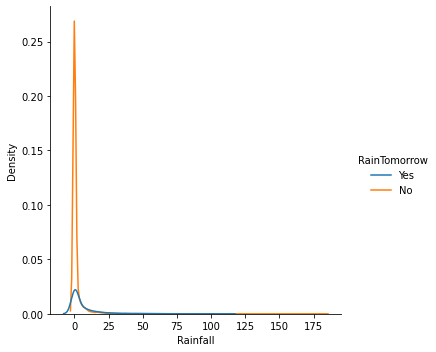

In [141]:
sns.displot(data=df_rainNew, x="Rainfall", hue="RainTomorrow", kind="kde")

<Axes: ylabel='Rainfall'>

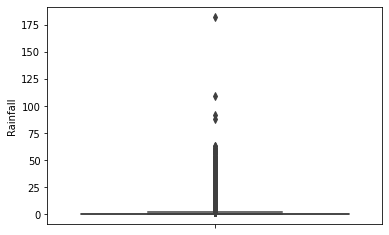

In [142]:
sns.boxplot(y =df_rainNew['Rainfall'])

##Análisis multivariado

In [143]:
datah=pd.get_dummies(df_rainNew, drop_first=True)
datah

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm_999.2,Pressure3pm_999.3,Pressure3pm_999.4,Pressure3pm_999.5,Pressure3pm_999.6,Pressure3pm_999.7,Pressure3pm_999.8,Pressure3pm_999.9,RainToday_Yes,RainTomorrow_Yes
4,4,25.1,33.1,0.2,8.6,3.3,46.0,17.0,24.0,66.0,...,0,0,0,0,0,0,0,0,0,1
8,8,17.5,28.6,0.0,6.4,10.7,39.0,17.0,26.0,48.0,...,0,0,0,0,0,0,0,0,0,0
10,10,5.3,12.8,3.8,0.4,5.6,56.0,15.0,15.0,64.0,...,0,0,0,0,0,0,0,0,1,0
12,12,12.4,34.5,0.0,8.2,13.0,44.0,13.0,31.0,44.0,...,0,0,0,0,0,0,0,0,0,0
14,14,15.8,29.1,0.0,11.6,11.7,39.0,11.0,30.0,39.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,14536,15.6,24.5,0.0,0.4,9.5,41.0,17.0,26.0,90.0,...,0,0,0,0,0,0,0,0,0,0
14537,14537,21.6,29.9,0.0,7.2,4.9,48.0,9.0,26.0,82.0,...,0,0,0,0,0,0,0,0,0,1
14538,14538,4.2,9.8,11.8,3.2,7.6,69.0,33.0,24.0,76.0,...,0,0,0,0,0,0,0,0,1,1
14539,14539,16.4,26.6,0.0,5.4,10.8,19.0,6.0,9.0,66.0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

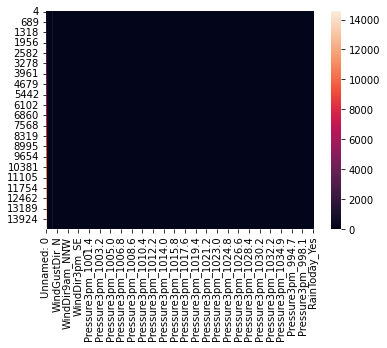

In [144]:
sns.heatmap(datah)

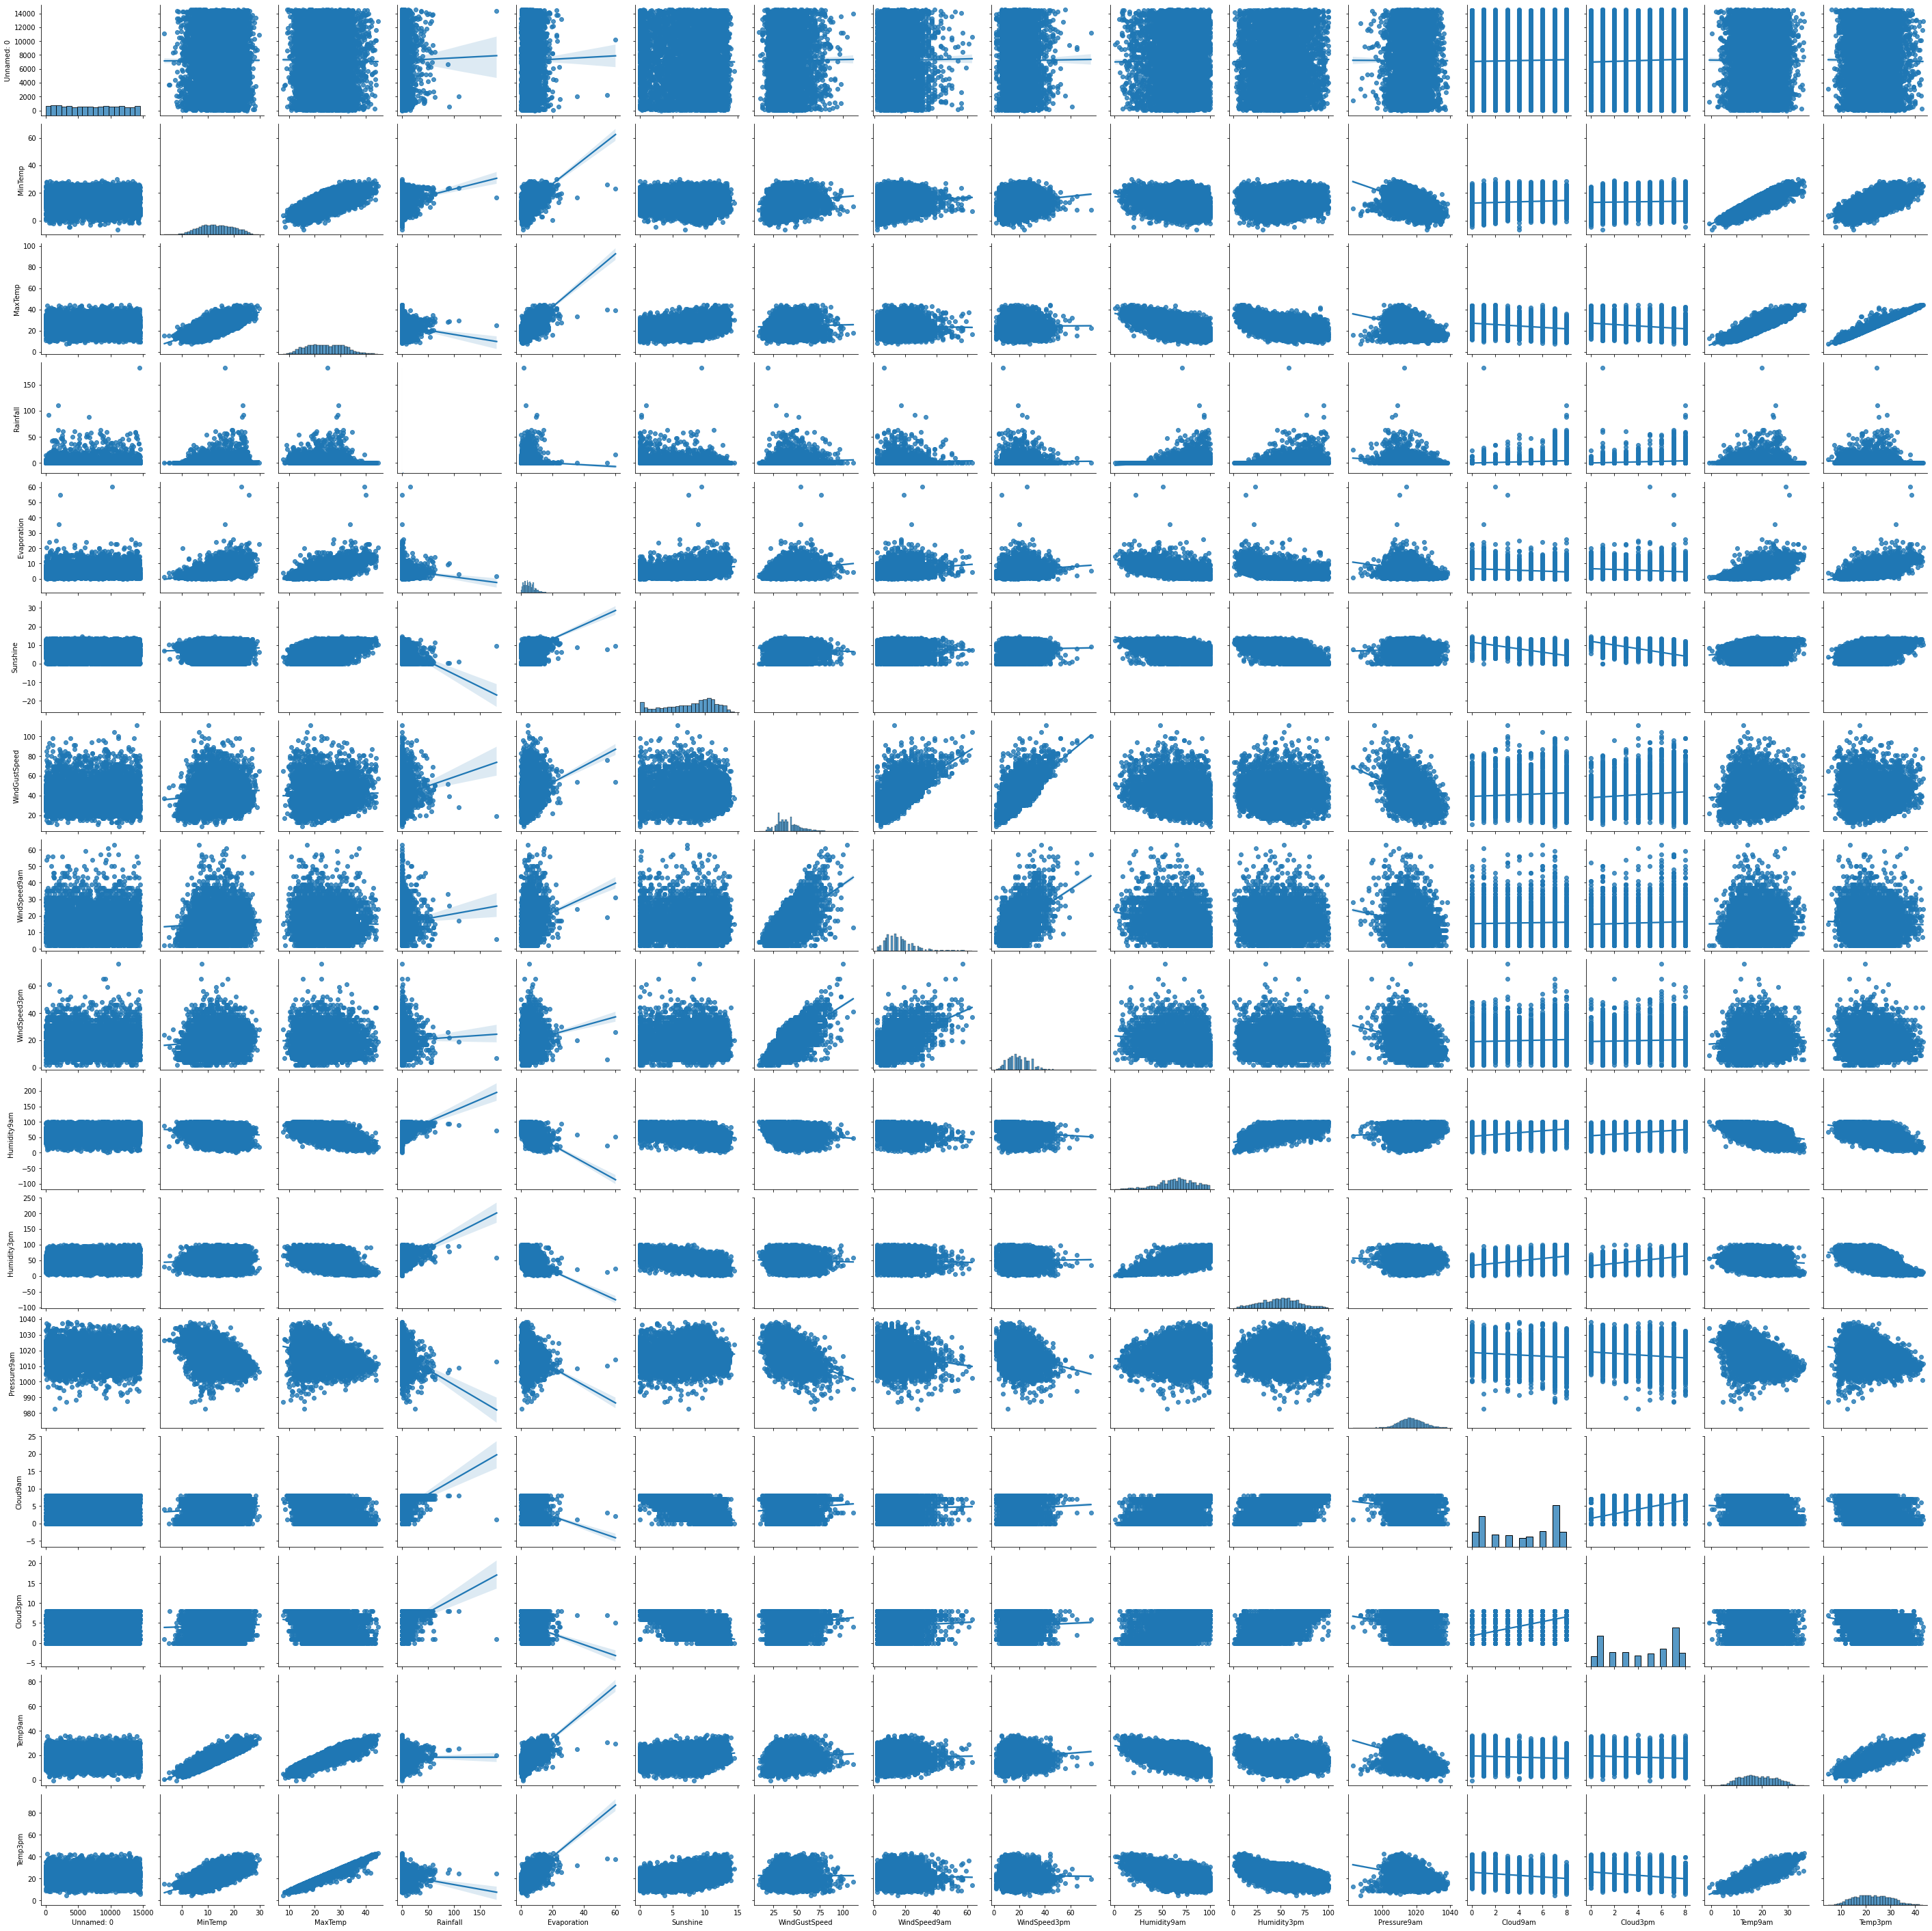

In [145]:
sns.pairplot(df_rainNew, kind = "reg",markers='o')

##Declarar vector de variables predictoras y variable objeto

In [146]:
code=pd.concat([datah],axis=1)
code.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm_999.2,Pressure3pm_999.3,Pressure3pm_999.4,Pressure3pm_999.5,Pressure3pm_999.6,Pressure3pm_999.7,Pressure3pm_999.8,Pressure3pm_999.9,RainToday_Yes,RainTomorrow_Yes
4,4,25.1,33.1,0.2,8.6,3.3,46.0,17.0,24.0,66.0,...,0,0,0,0,0,0,0,0,0,1
8,8,17.5,28.6,0.0,6.4,10.7,39.0,17.0,26.0,48.0,...,0,0,0,0,0,0,0,0,0,0
10,10,5.3,12.8,3.8,0.4,5.6,56.0,15.0,15.0,64.0,...,0,0,0,0,0,0,0,0,1,0
12,12,12.4,34.5,0.0,8.2,13.0,44.0,13.0,31.0,44.0,...,0,0,0,0,0,0,0,0,0,0
14,14,15.8,29.1,0.0,11.6,11.7,39.0,11.0,30.0,39.0,...,0,0,0,0,0,0,0,0,0,0


##Dividir datos en conjunto de entrenamiento y prueba

In [147]:
features=datah.iloc[:, :10]
target=datah['RainTomorrow_Yes']
features, target

(       Unnamed: 0  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 4               4     25.1     33.1       0.2          8.6       3.3   
 8               8     17.5     28.6       0.0          6.4      10.7   
 10             10      5.3     12.8       3.8          0.4       5.6   
 12             12     12.4     34.5       0.0          8.2      13.0   
 14             14     15.8     29.1       0.0         11.6      11.7   
 ...           ...      ...      ...       ...          ...       ...   
 14536       14536     15.6     24.5       0.0          0.4       9.5   
 14537       14537     21.6     29.9       0.0          7.2       4.9   
 14538       14538      4.2      9.8      11.8          3.2       7.6   
 14539       14539     16.4     26.6       0.0          5.4      10.8   
 14543       14543     23.9     33.0       2.8          2.0       6.7   
 
        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  
 4               46.0          17.0          24.0        

In [148]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

##Escalado de características

In [149]:
scaler = MinMaxScaler()

In [150]:
dfescalado = scaler.fit_transform(datah)

##Entrenamiento del modelo

In [151]:
Tree=DecisionTreeClassifier(max_depth=3,criterion='entropy',class_weight='balanced', splitter='best')

##Predecir resultados

In [152]:
Tree=Tree.fit(X_train,y_train)

In [153]:
y_pred=Tree.predict(X_test)

In [154]:
print(f"Profundidad del árbol: {Tree.get_depth()}")
print(f"Número de nodos terminales: {Tree.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


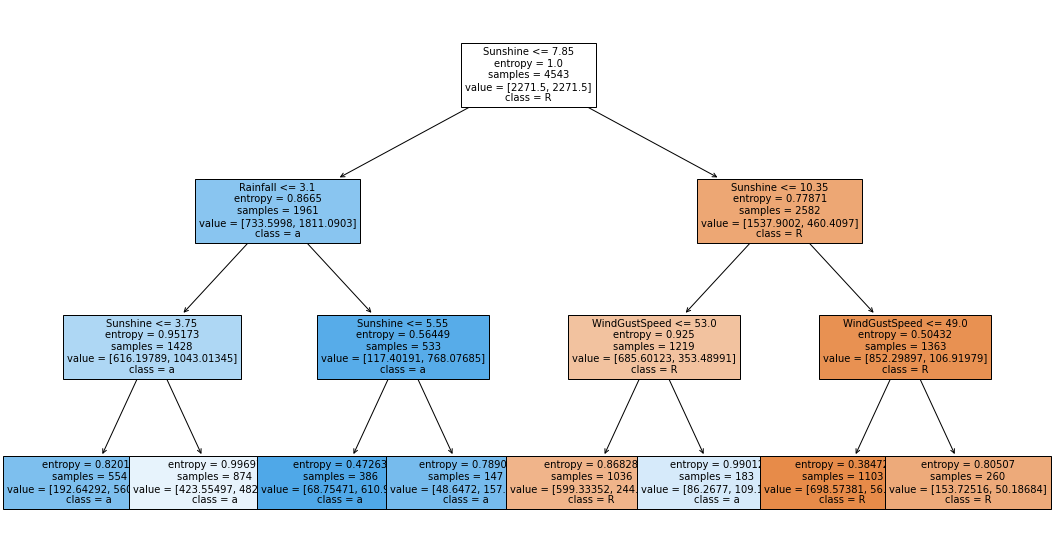

In [155]:
fig, ax = plt.subplots(figsize=(18, 10))
plot = plot_tree (decision_tree = Tree,feature_names = features.columns,class_names='RainTomorrow',filled = True,impurity =True,fontsize = 10,precision = 5,ax = ax)

In [156]:
texto_modelo = export_text(
                    decision_tree = Tree,
                    feature_names = list(features.columns)
               )
print(texto_modelo)

|--- Sunshine <= 7.85
|   |--- Rainfall <= 3.10
|   |   |--- Sunshine <= 3.75
|   |   |   |--- class: 1
|   |   |--- Sunshine >  3.75
|   |   |   |--- class: 1
|   |--- Rainfall >  3.10
|   |   |--- Sunshine <= 5.55
|   |   |   |--- class: 1
|   |   |--- Sunshine >  5.55
|   |   |   |--- class: 1
|--- Sunshine >  7.85
|   |--- Sunshine <= 10.35
|   |   |--- WindGustSpeed <= 53.00
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  53.00
|   |   |   |--- class: 1
|   |--- Sunshine >  10.35
|   |   |--- WindGustSpeed <= 49.00
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  49.00
|   |   |   |--- class: 0



## Comprobar score de precisión

In [157]:
Tree.predict_proba(X_test)

array([[0.92488754, 0.07511246],
       [0.46761091, 0.53238909],
       [0.71034511, 0.28965489],
       ...,
       [0.71034511, 0.28965489],
       [0.46761091, 0.53238909],
       [0.71034511, 0.28965489]])

In [158]:
print(y_test.value_counts())

0    906
1    230
Name: RainTomorrow_Yes, dtype: int64


##Matriz de confusión

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
MC = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    labels=None,
    normalize=None,
)

In [160]:
pd.DataFrame(
    confusion_matrix(
        y_true=y_test,
        y_pred=y_pred,
        labels=[1, 0],
        normalize=None,
    ),
    columns=["TP", "FN"],
    index=["T", "N"],
)

,TP,FN
T,200,30
N,305,601


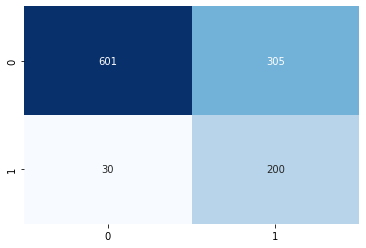

In [161]:
sns.heatmap(
    MC,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()

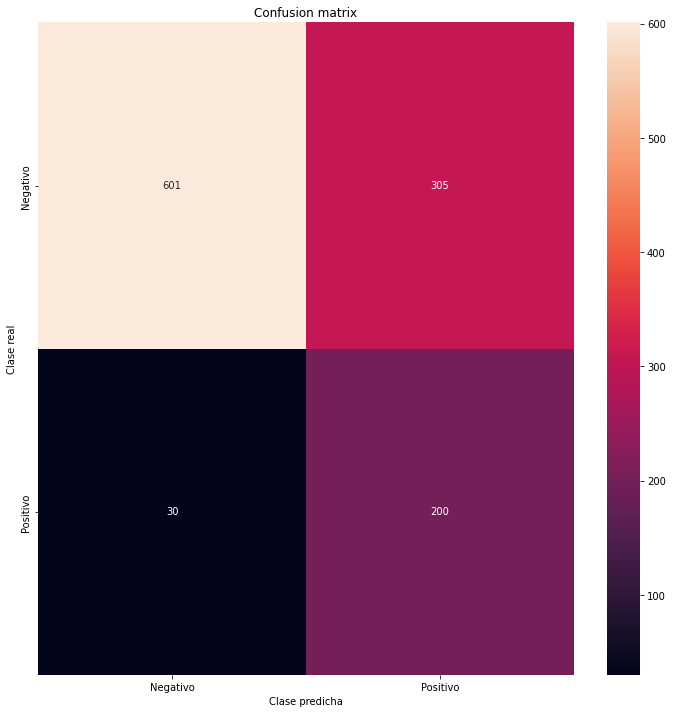

              precision    recall  f1-score   support

           0       0.95      0.66      0.78       906
           1       0.40      0.87      0.54       230

    accuracy                           0.71      1136
   macro avg       0.67      0.77      0.66      1136
weighted avg       0.84      0.71      0.73      1136



In [162]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y =Tree.predict(X_test)
mostrar_resultados(y_test, y_pred)

## Métricas de clasificación

In [163]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7051056338028169


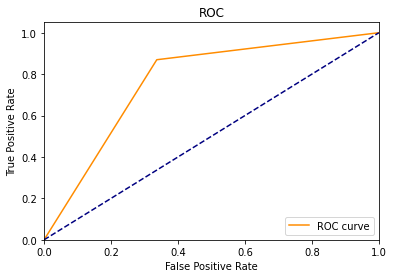

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [165]:
roc_auc_score(y_test, y_pred)

0.7664603128899126

In [166]:
print('El AUC, área bajo la curva ROC es: ',roc_auc_score(y_test, y_pred))

El AUC, área bajo la curva ROC es:  0.7664603128899126


##Modelo Logistic regression

In [167]:
modeloRL=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight='balanced')
modeloRL.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

In [168]:
y_pred=modeloRL.predict(X_test)

In [169]:
modeloRL.predict_proba(X_test)

array([[0.94831084, 0.05168916],
       [0.47      , 0.53      ],
       [0.93847564, 0.06152436],
       ...,
       [0.82304216, 0.17695784],
       [0.44983497, 0.55016503],
       [0.75054906, 0.24945094]])

In [170]:
print(y_test.value_counts())

0    906
1    230
Name: RainTomorrow_Yes, dtype: int64


In [171]:
acc_log=[]
print(classification_report(y_test,y_pred))
acc=roc_auc_score(y_test,y_pred)
acc_log.append(acc)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       906
           1       0.48      0.74      0.58       230

    accuracy                           0.78      1136
   macro avg       0.70      0.77      0.72      1136
weighted avg       0.83      0.78      0.80      1136



In [172]:
MC = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    labels=None,
    normalize=None,
)

In [173]:
pd.DataFrame(
    confusion_matrix(
        y_true=y_test,
        y_pred=y_pred,
        labels=[1, 0],
        normalize=None,
    ),
    columns=["PP", "PF"],
    index=["P", "F"],
)

,PP,PF
P,171,59
F,186,720


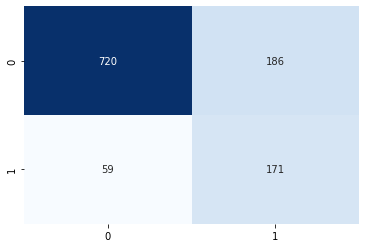

In [174]:
sns.heatmap(
    MC,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()

In [175]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.784330985915493


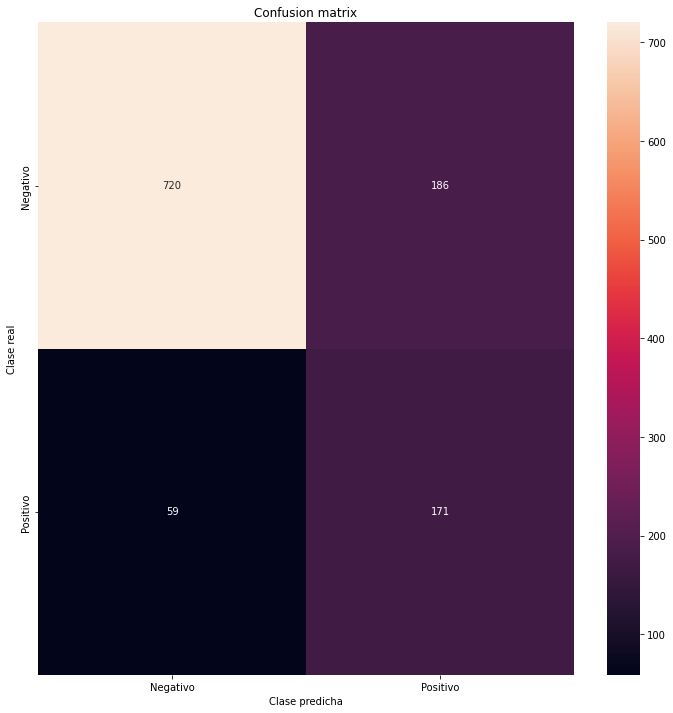

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       906
           1       0.48      0.74      0.58       230

    accuracy                           0.78      1136
   macro avg       0.70      0.77      0.72      1136
weighted avg       0.83      0.78      0.80      1136



In [176]:
def mostrar_resultados(y_test, pred_y):
    matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(matrix, xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = modeloRL.predict(X_test)
mostrar_resultados(y_test, y_pred)

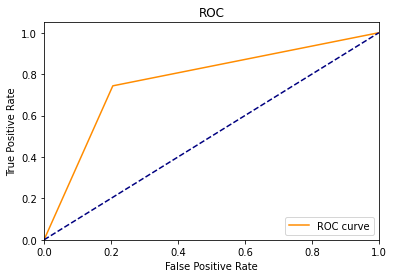

In [177]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [178]:
print('El AUC,  area bajo la curva ROC es: ',roc_auc_score(y_test, y_pred))

El AUC,  area bajo la curva ROC es:  0.769090123812266


##Conclusion

Podemos ver que la predicción de datos es bastante buena porque la mayoria de datos es exacta